This Jupyter notebook provides an example on how to analyze Netlogo data with Python. It is based on Chris Davis' analysis of Netlogo data in R that can be found [here](https://cbdavis.github.io/Demo-Analyzing-Netlogo-Data-with-R/NetLogoDataDemo.html). In particular, we use the same data file.

In [1]:
#Load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [2]:
# We start by reading in the file generated by Netlogo's behaviorspace.
Basecase = pd.read_csv('Reusevariationzonder100.csv', skiprows=6, low_memory=False)
Basecasenormal = pd.read_csv('Reusevariationzonder100.csv', skiprows=6, low_memory=False)

In [3]:
# Ok, let's see what it looks like. Display the first 5 rows
Basecase[:5]

,[run number],Value-of-price-modification,Social-influence,Disposal-feedback?,Number-consumers,Social-influence-radius,Lifetime-decrease-reuse,Scenario?,Random-seed?,Model-scale,...,Possession-wears-average,[step],service-lifespan,new-consumption,wears,owners,reused-textiles-percentage,textiles-in-closet,reused-textiles-average,new-textiles-average
0,2,0,0.5,True,50,10,30,True,False,0.1,...,77,0,2.557875,0.0,37.145183,1.0,0.0,170.0,0.0,170.0
1,3,0,0.5,True,50,10,30,True,False,0.1,...,77,0,2.562085,0.0,38.429170,1.0,0.0,170.0,0.0,170.0
2,8,0,0.5,True,50,10,30,True,False,0.1,...,77,0,2.615186,0.0,39.218845,1.0,0.0,170.0,0.0,170.0
3,5,0,0.5,True,50,10,30,True,False,0.1,...,77,0,2.479586,0.0,37.521236,1.0,0.0,170.0,0.0,170.0
4,4,0,0.5,True,50,10,30,True,False,0.1,...,77,0,2.583349,0.0,38.189337,1.0,0.0,170.0,0.0,170.0


In [4]:
Basecase['[step]'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0              0
1              0
2              0
3              0
4              0
           ...  
2744995    27445
2744996    27446
2744997    27447
2744998    27448
2744999    27449
Name: [step], Length: 2745000, dtype: int64>

In [5]:
# Rename two column names
Basecase.rename(columns={'Reuse-percentage-fixed':'Reuse percentage [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal.rename(columns={'Reuse-percentage-fixed':'Reuse percentage [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal['year']=Basecasenormal['tick'].div(365)

In [6]:
Basecase.drop(Basecase[Basecase['tick'] < 5475].index, inplace = True)

Basecase['year1']=Basecase['tick'].div(365)
Basecase['year']=Basecase['year1']-15
Basecase[0:100]

,run_number,Value-of-price-modification,Social-influence,Disposal-feedback?,Number-consumers,Social-influence-radius,Lifetime-decrease-reuse,Scenario?,Random-seed?,Model-scale,...,service-lifespan,new-consumption,wears,owners,reused-textiles-percentage,textiles-in-closet,reused-textiles-average,new-textiles-average,year1,year
41638,2,0,0.5,True,50,10,30,True,False,0.1,...,2.955946,38.765794,16.120450,1.0,0.0,204.6,0.0,195.6,15.000000,0.000000
41645,2,0,0.5,True,50,10,30,True,False,0.1,...,2.958686,38.758696,16.135685,1.0,0.0,204.6,0.0,195.6,15.002740,0.002740
41650,2,0,0.5,True,50,10,30,True,False,0.1,...,2.952086,38.764964,16.083129,1.0,0.0,204.6,0.0,195.6,15.005479,0.005479
41656,2,0,0.5,True,50,10,30,True,False,0.1,...,2.953158,38.757870,16.093756,1.0,0.0,204.4,0.0,195.4,15.008219,0.008219
41667,2,0,0.5,True,50,10,30,True,False,0.1,...,2.952878,38.764135,16.092536,1.0,0.0,204.6,0.0,195.6,15.010959,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42131,2,0,0.5,True,50,10,30,True,False,0.1,...,2.973352,38.783725,16.319634,1.0,0.0,205.6,0.0,196.6,15.191781,0.191781
42136,7,0,0.5,True,50,10,30,True,False,0.1,...,2.995786,38.636098,15.959803,1.0,0.0,210.0,0.0,203.0,15.068493,0.068493
42137,2,0,0.5,True,50,10,30,True,False,0.1,...,2.967045,38.816308,16.285193,1.0,0.0,206.2,0.0,197.2,15.194521,0.194521
42143,7,0,0.5,True,50,10,30,True,False,0.1,...,2.998526,38.629056,15.974581,1.0,0.0,210.0,0.0,203.0,15.071233,0.071233


In [7]:
Basecase['service-lifespan-1']=2*Basecase['service-lifespan']
Basecasenormal['service-lifespan-1']=2*Basecasenormal['service-lifespan']

Basecase['wears-1']=2*Basecase['wears']
Basecasenormal['wears-1']=2*Basecasenormal['wears']

In [8]:
Basecase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197500 entries, 41638 to 2744999
Data columns (total 40 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   run_number                         int64  
 1   Value-of-price-modification        int64  
 2   Social-influence                   float64
 3   Disposal-feedback?                 bool   
 4   Number-consumers                   int64  
 5   Social-influence-radius            int64  
 6   Lifetime-decrease-reuse            int64  
 7   Scenario?                          bool   
 8   Random-seed?                       bool   
 9   Model-scale                        float64
 10  Possession-span-average            float64
 11  Value-of-convenience-modification  int64  
 12  Segment-influence                  int64  
 13  Retailer-supply?                   bool   
 14  Environmental-influence            int64  
 15  Initial-number-textiles            int64  
 16  Reuse percenta

In [9]:
Basecase['Reuse percentage [%]'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 41638                  0
41645                  0
41650                  0
41656                  0
41667                  0
               ...      
2744995    Current + 30%
2744996    Current + 30%
2744997    Current + 30%
2744998    Current + 30%
2744999    Current + 30%
Name: Reuse percentage [%], Length: 2197500, dtype: object>

In [10]:
check = np.linspace(start = 0, stop = 100, num = 100).astype(int)
Basecase_short = Basecase[Basecase['year'].isin(check)]
Basecasenormal_short = Basecasenormal[Basecasenormal['year'].isin(check)]

# Short database

In [11]:
Basecasenormal_short['year'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
2743465    71.0
2743830    72.0
2744195    73.0
2744560    74.0
2744925    75.0
Name: year, Length: 7600, dtype: float64>

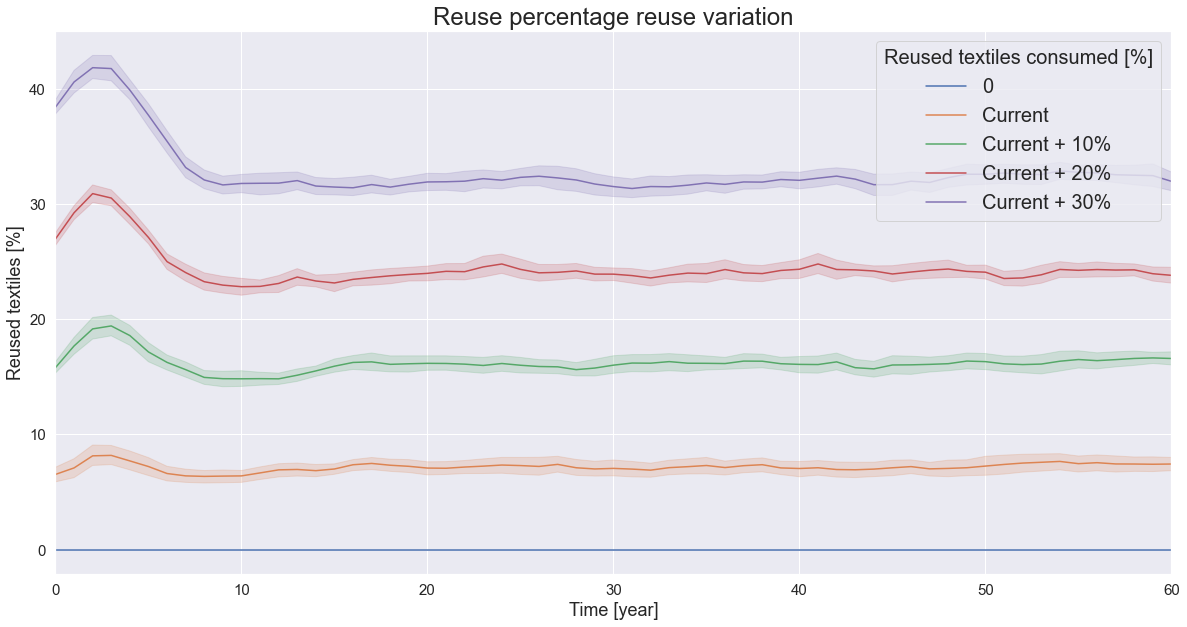

In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'reused-textiles-percentage', hue = 'Reuse percentage [%]', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Reused textiles [%]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 60)
plt.title("Reuse percentage reuse variation", fontsize = 24)
plt.legend(title = "Reused textiles consumed [%]", title_fontsize = 20, fontsize =20)

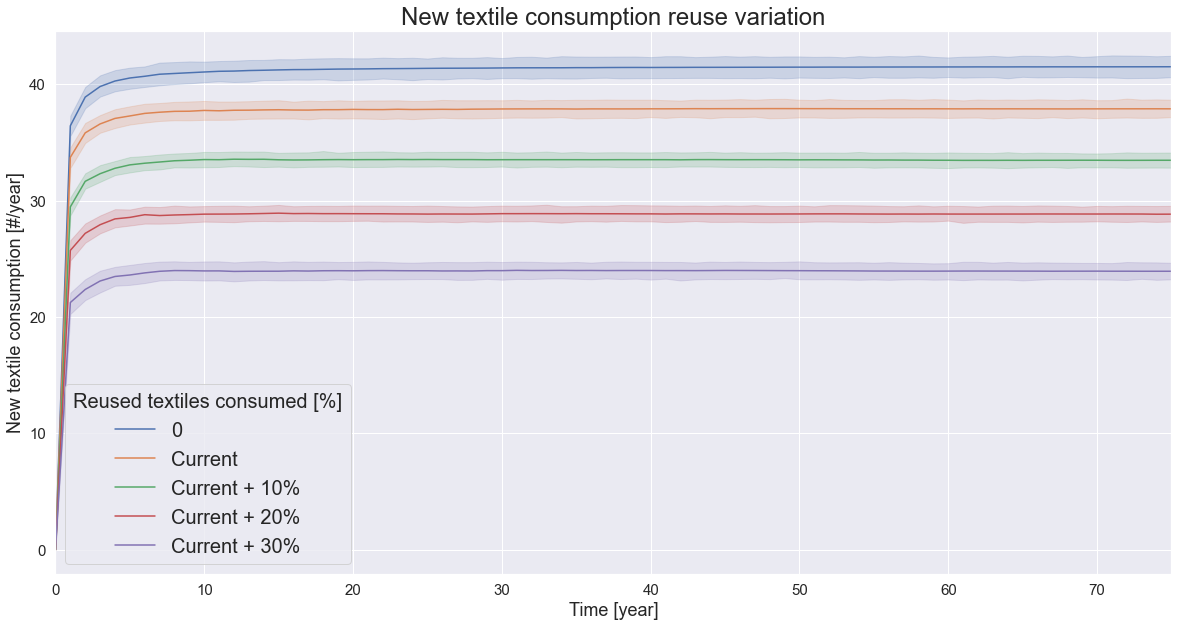

In [16]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'new-consumption', hue = 'Reuse percentage [%]', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("New textile consumption [#/year]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.title("New textile consumption reuse variation", fontsize = 24)
plt.legend(title = "Reused textiles consumed [%]", title_fontsize = 20, fontsize =20)

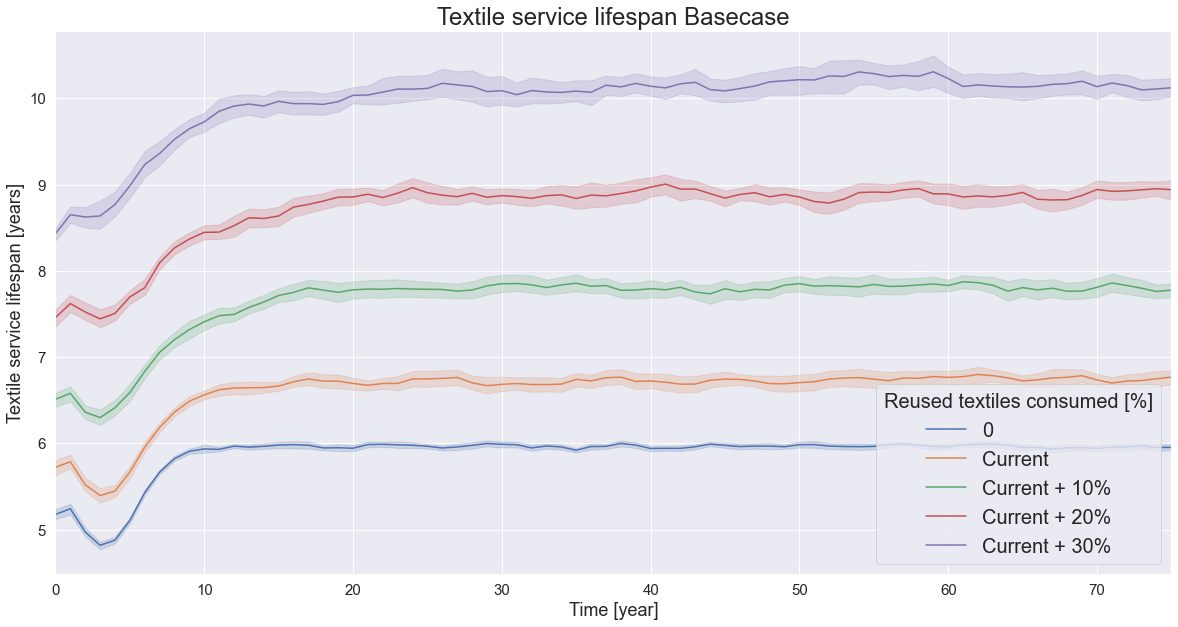

In [17]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'service-lifespan-1',hue = 'Reuse percentage [%]', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Textile service lifespan [years]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 75)
plt.title("Textile service lifespan Basecase", fontsize = 24)
plt.legend(title = "Reused textiles consumed [%]", title_fontsize = 20, fontsize =20)

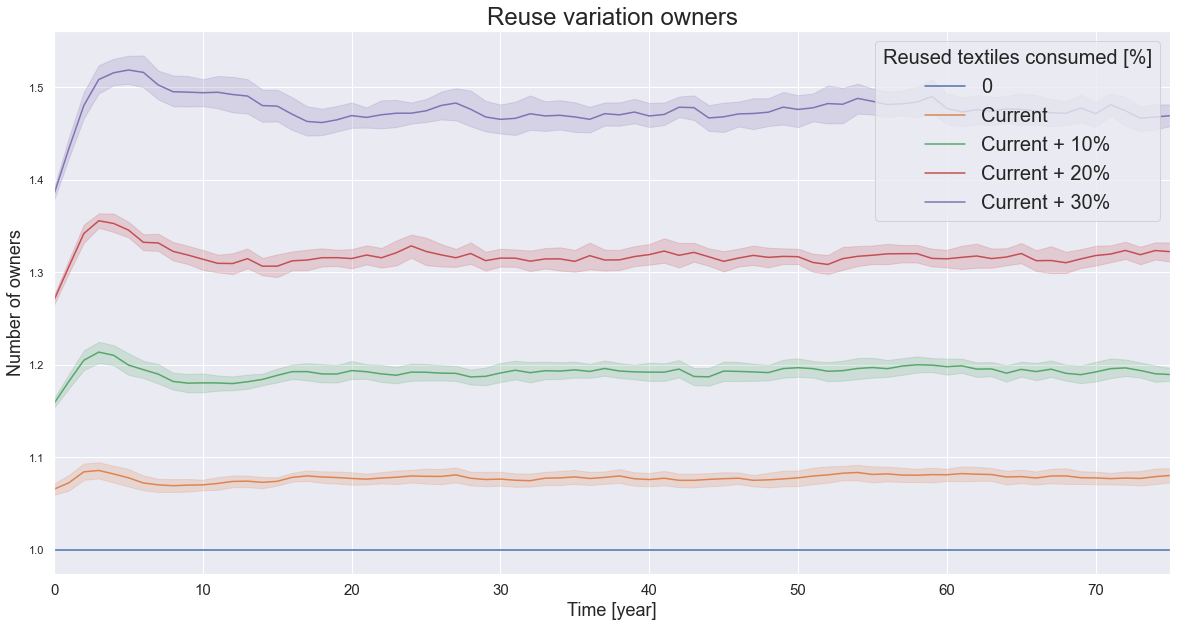

In [18]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'owners', hue = 'Reuse percentage [%]', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Number of owners", fontsize=18)
plt.xticks(fontsize=15)
plt.xlim(0, 75)
#plt.ylim(1.06,1.12)
plt.title("Reuse variation owners", fontsize = 24)
plt.legend(title = "Reused textiles consumed [%]", title_fontsize = 20, fontsize =20)

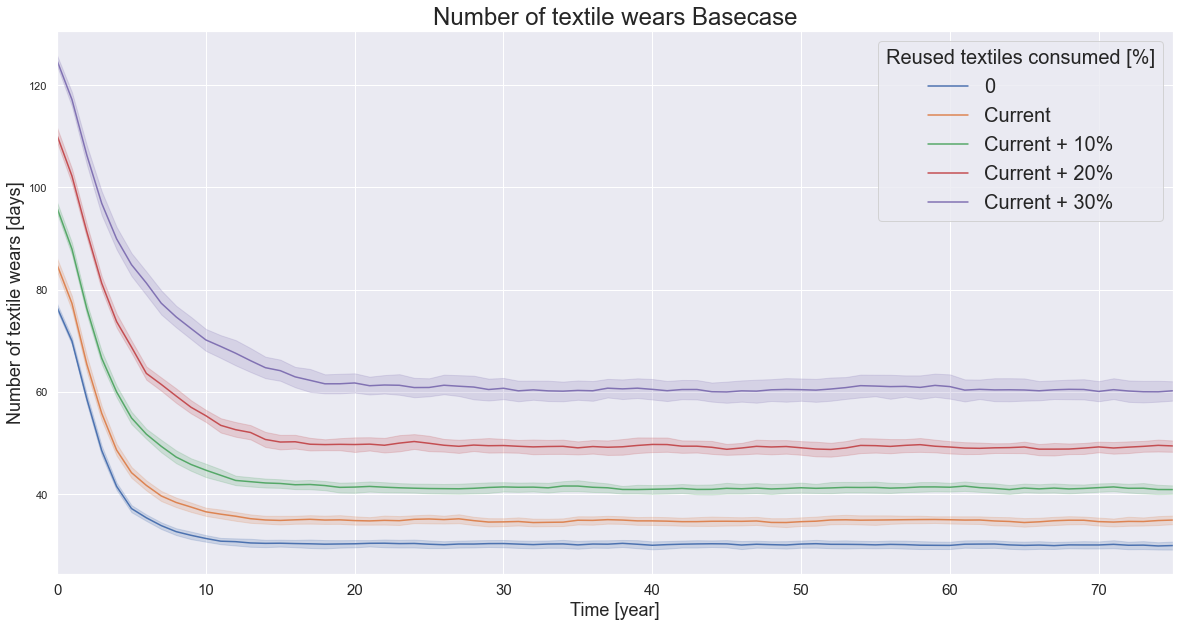

In [19]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'wears-1', hue = 'Reuse percentage [%]', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Number of textile wears [days]", fontsize=18)
plt.xticks(fontsize=15)
plt.xlim(0, 75)
#plt.ylim(1.06,1.12)
plt.title("Number of textile wears Basecase", fontsize = 24)
plt.legend(title = "Reused textiles consumed [%]", title_fontsize = 20, fontsize =20)

# Figures not shortend

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Current + 10%'),
  Text(3, 0, 'Current + 20%'),
  Text(4, 0, 'Current + 30%')])

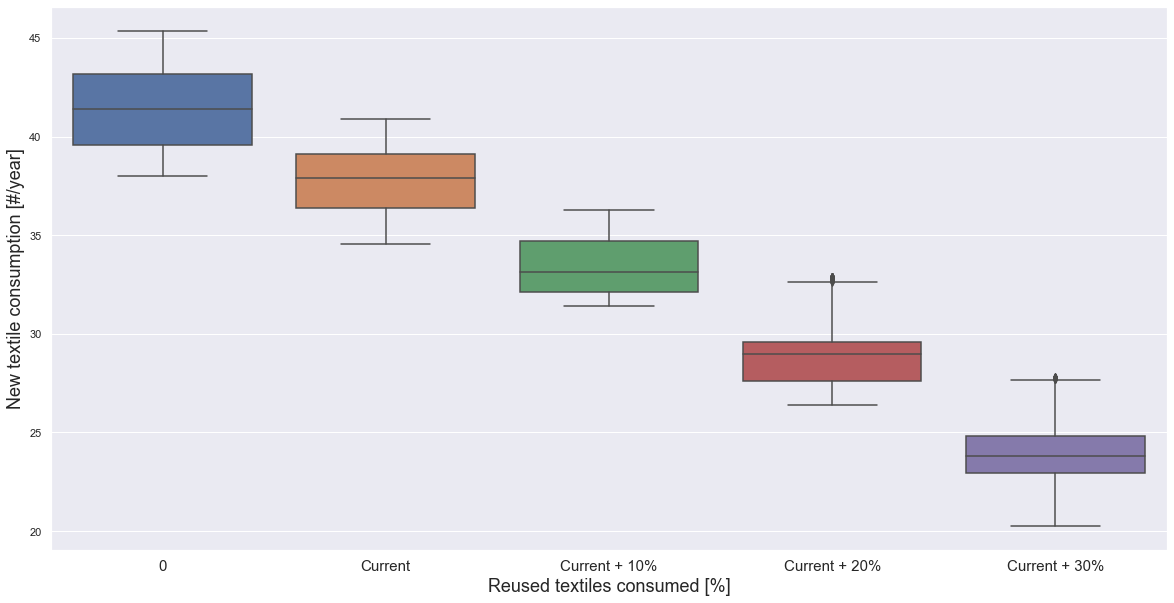

In [23]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(data=Basecase_short, y ='new-consumption', x = 'Reuse percentage [%]')
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('New textile consumption [#/year]', fontsize=18)
plt.xticks(fontsize=15)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Current + 10%'),
  Text(3, 0, 'Current + 20%'),
  Text(4, 0, 'Current + 30%')])

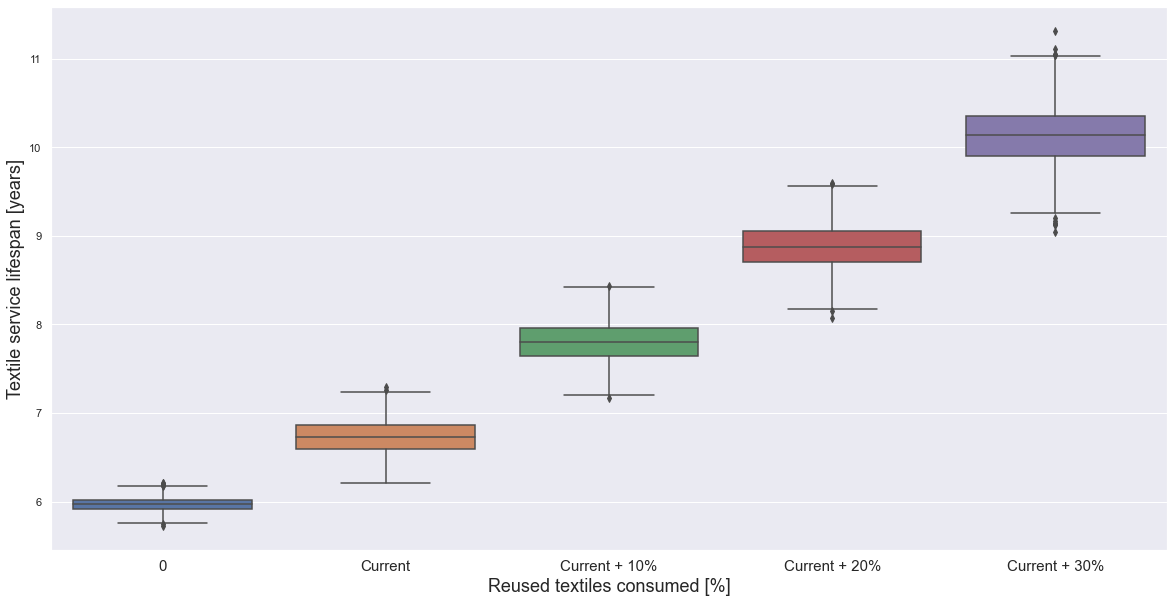

In [24]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(data=Basecase_short, y ='service-lifespan-1', x = 'Reuse percentage [%]')
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('Textile service lifespan [years]', fontsize=18)
plt.xticks(fontsize=15)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Current + 10%'),
  Text(3, 0, 'Current + 20%'),
  Text(4, 0, 'Current + 30%')])

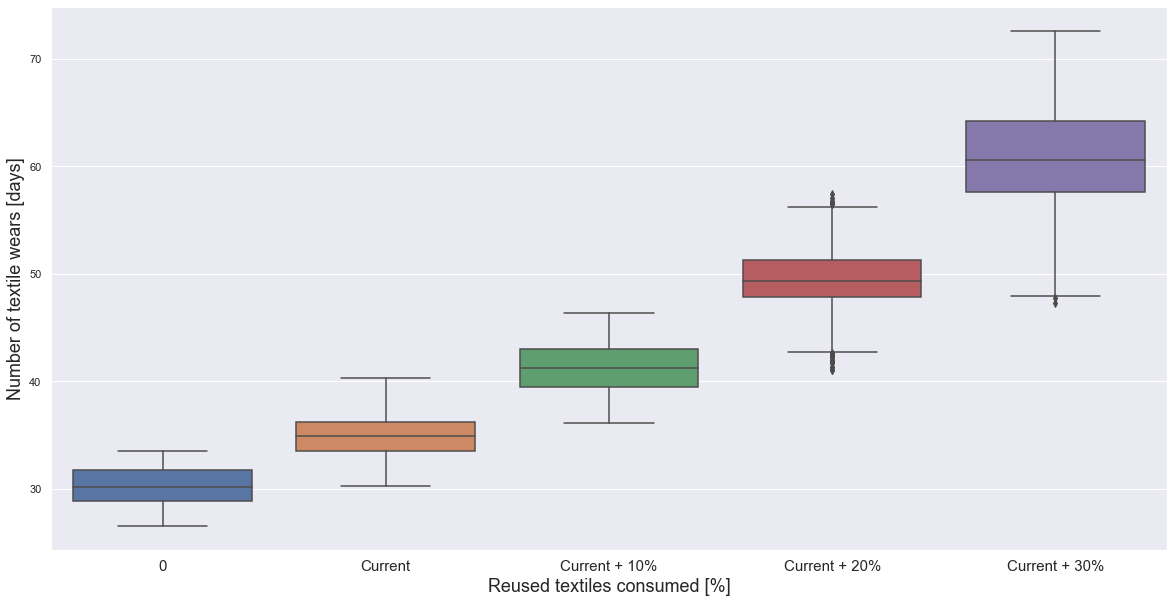

In [25]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(data=Basecase_short, y ='wears-1', x = 'Reuse percentage [%]')
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('Number of textile wears [days]', fontsize=18)
plt.xticks(fontsize=15)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Current + 10%'),
  Text(3, 0, 'Current + 20%'),
  Text(4, 0, 'Current + 30%')])

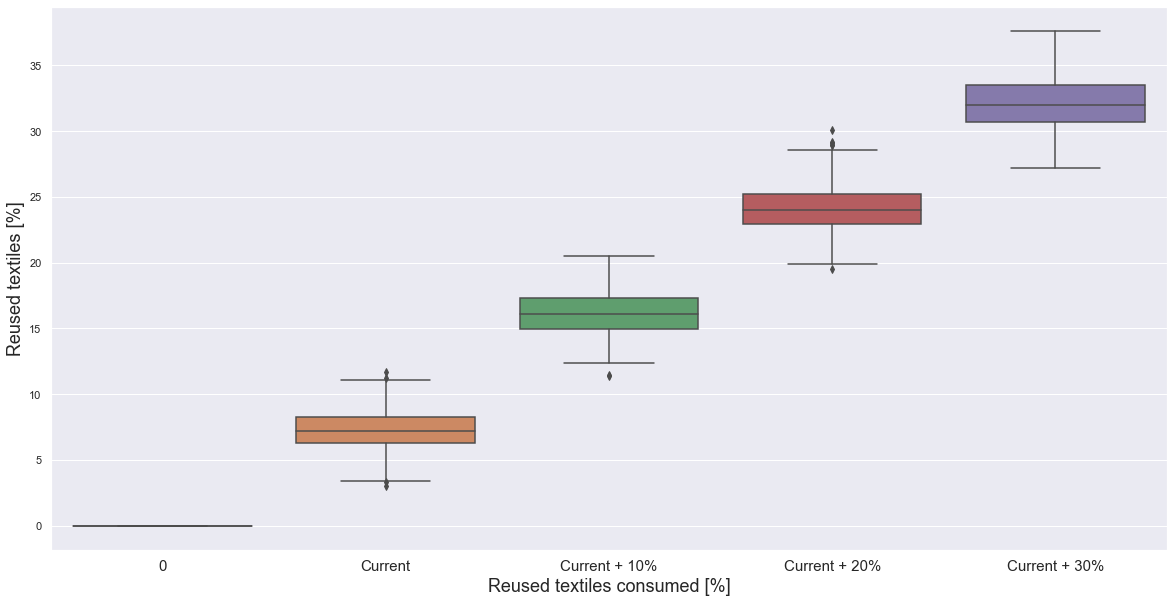

In [26]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(data=Basecase_short, y ='reused-textiles-percentage', x = 'Reuse percentage [%]')
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('Reused textiles [%]', fontsize=18)
plt.xticks(fontsize=15)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Current'),
  Text(2, 0, 'Current + 10%'),
  Text(3, 0, 'Current + 20%'),
  Text(4, 0, 'Current + 30%')])

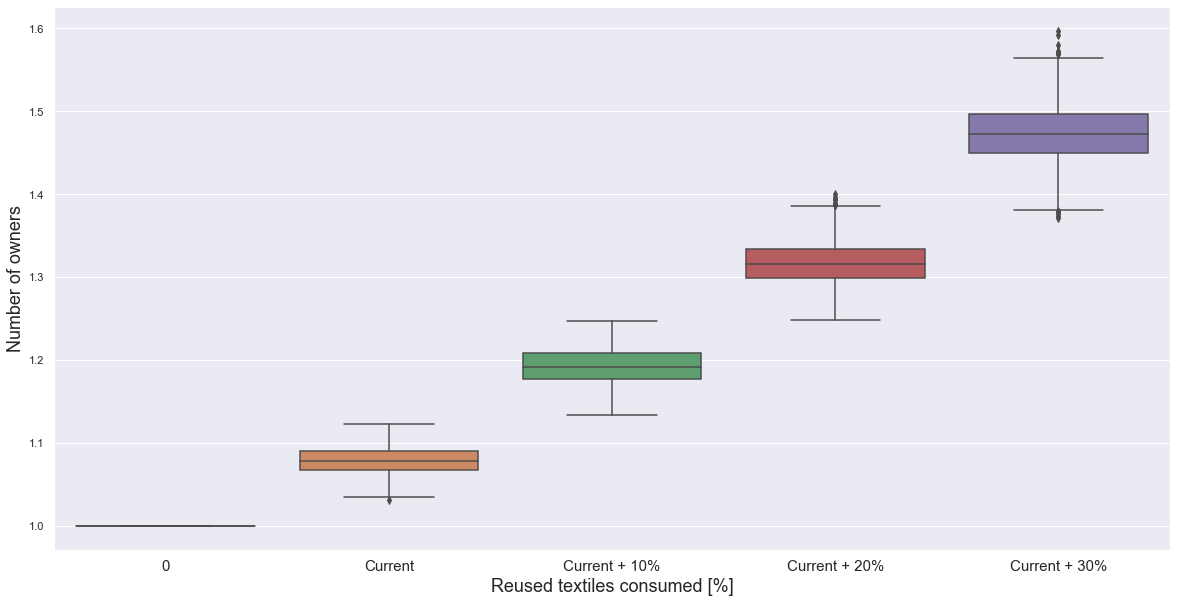

In [27]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(data=Basecase_short, y ='owners', x = 'Reuse percentage [%]')
plt.xlabel('Reused textiles consumed [%]', fontsize = 18)
plt.ylabel('Number of owners', fontsize=18)
plt.xticks(fontsize=15)

<AxesSubplot:>

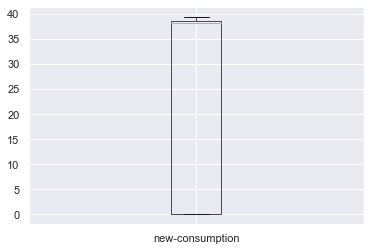

In [97]:
sns.set_theme(style="darkgrid")
Basecasenormal.boxplot(column =['new-consumption'])


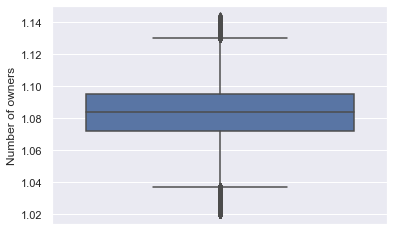

In [42]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(y=Basecasenormal['owners'])
ax.set_ylabel("Number of owners")
plt.show()

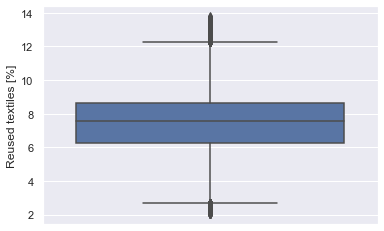

In [72]:
sns.set_theme(style="darkgrid")
plt.figure(figsize(20, 10))
ax = sns.boxplot(y=Basecasenormal['reused-textiles-percentage'])
ax.set_ylabel("Reused textiles [%]")
plt.show()

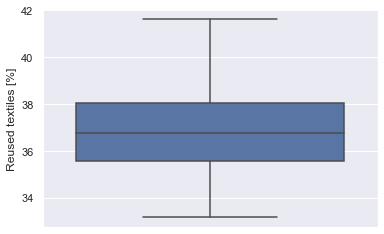

In [49]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(y=myDataframe['new-consumption'])
ax.set_ylabel("Reused textiles [%]")
plt.show()

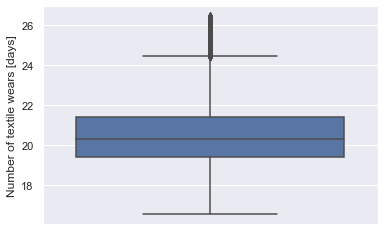

In [43]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(y=myDataframe['wears'])
ax.set_ylabel("Number of textile wears [days]")
plt.show()